<a href="https://colab.research.google.com/github/bacoco/deeplearning.fr/blob/main/eda_and_automl_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT your DATA to classify

In [1]:
import pandas as pd

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(return_X_y=False)

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
target='target'
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

##### library to import

In [2]:
import sys
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[target], test_size=0.25)

# EDA - Exploratory Data Analysis


## SWEETVIZ

> https://github.com/fbdesignpro/sweetviz

> https://youtu.be/UR_OK8vBpeY




In [ ]:
!pip install sweetviz

In [5]:
import sweetviz as sv

my_report = sv.analyze(df)

# we generate html report
# Default arguments will generate to "SWEETVIZ_REPORT.html"
my_report.show_html() 

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



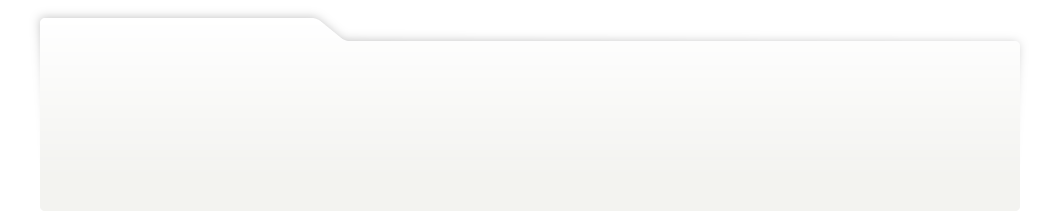
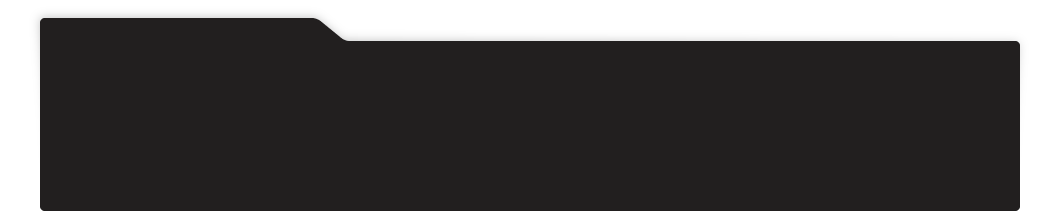
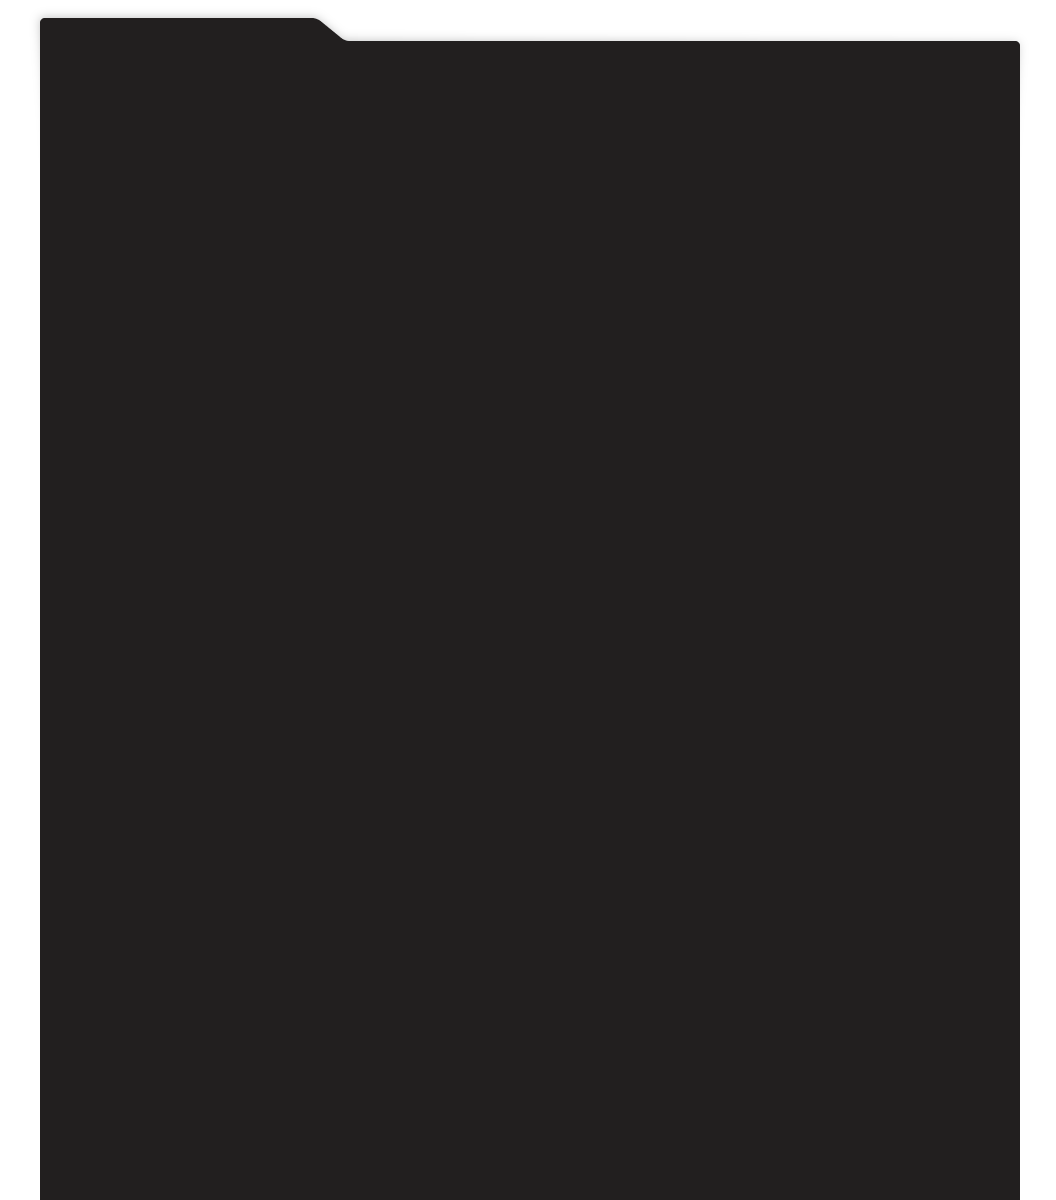
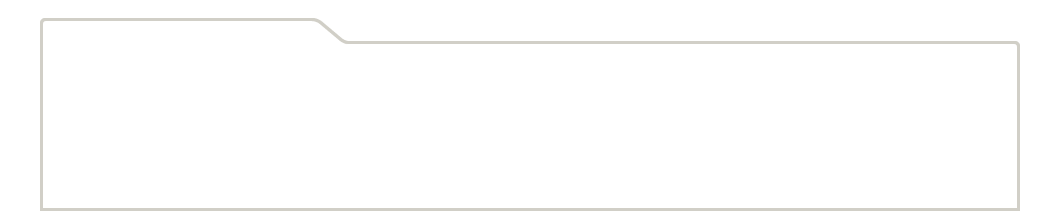
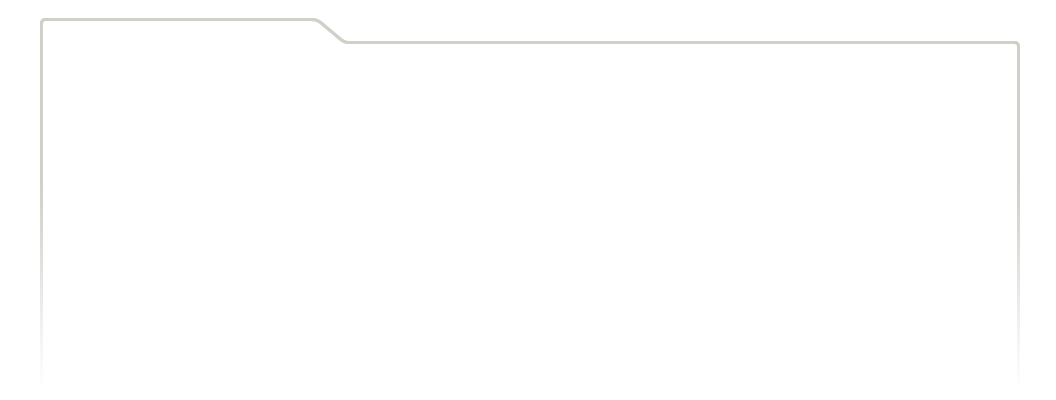
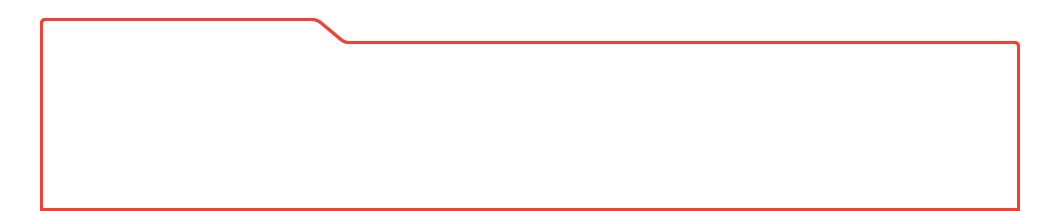
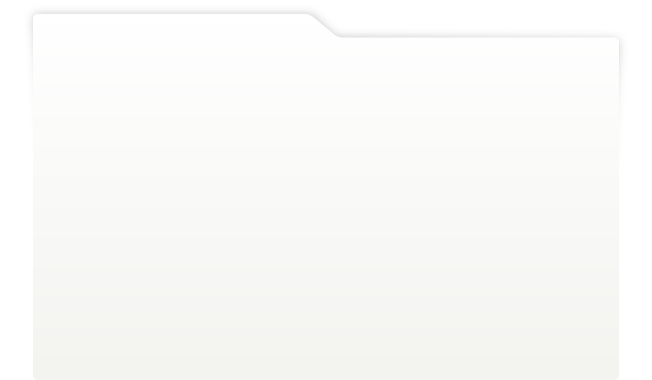
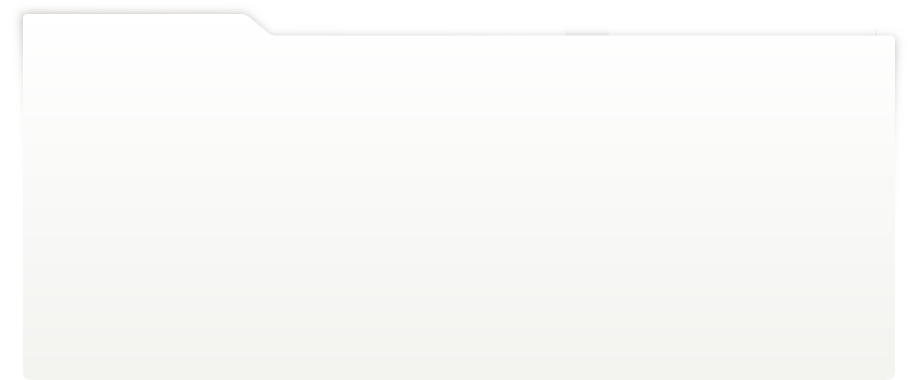
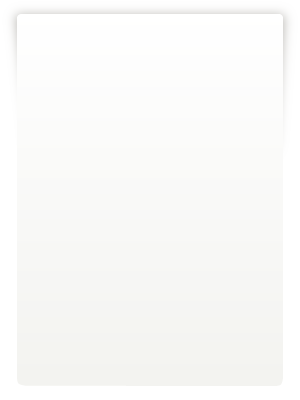
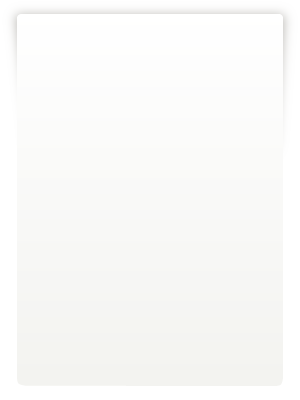
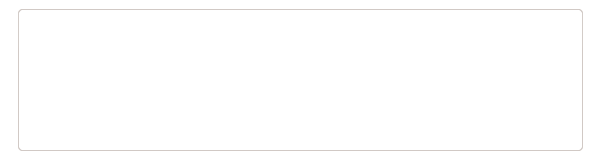
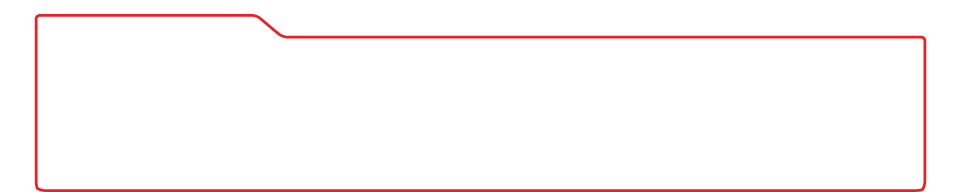
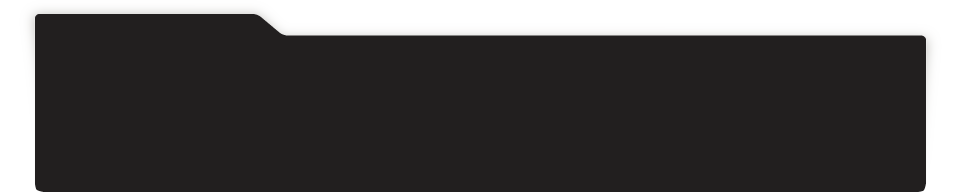
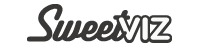
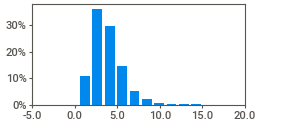
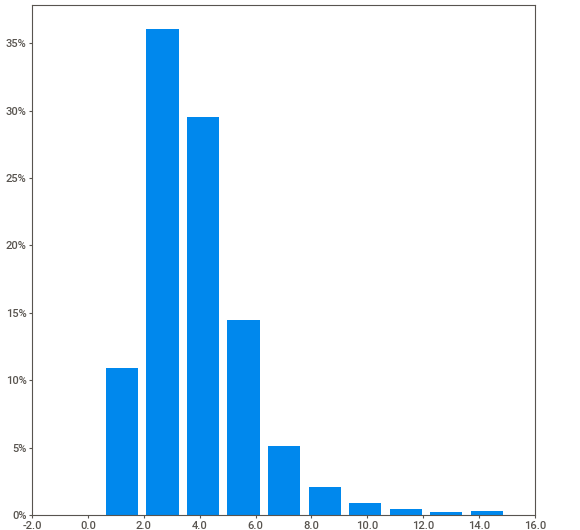
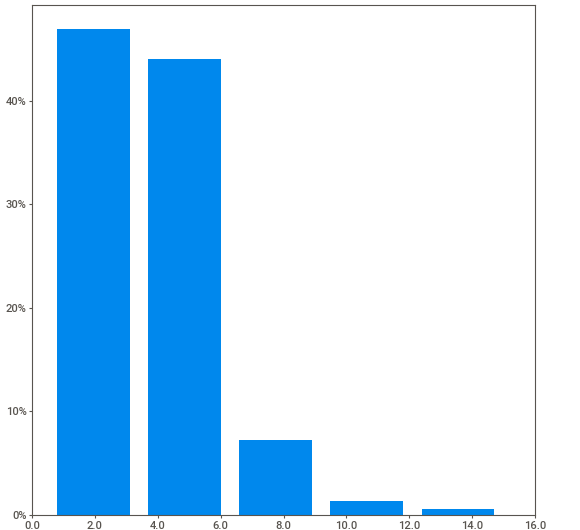
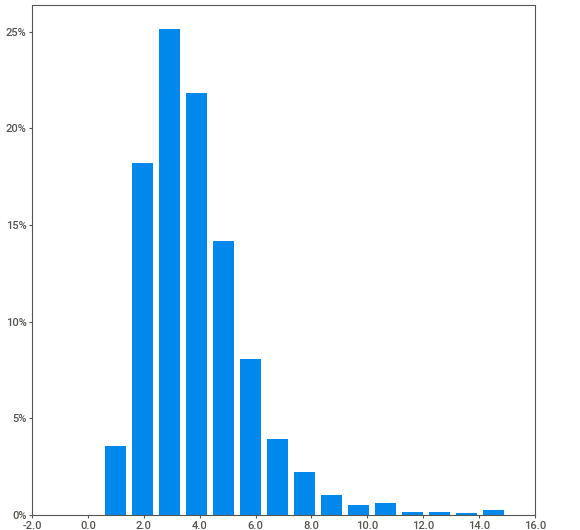
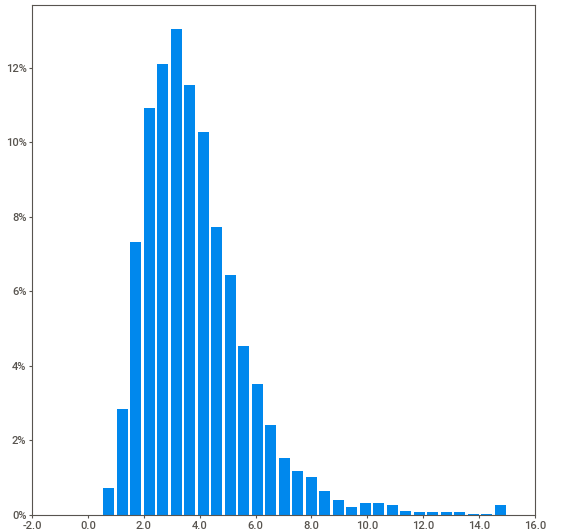
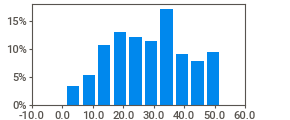
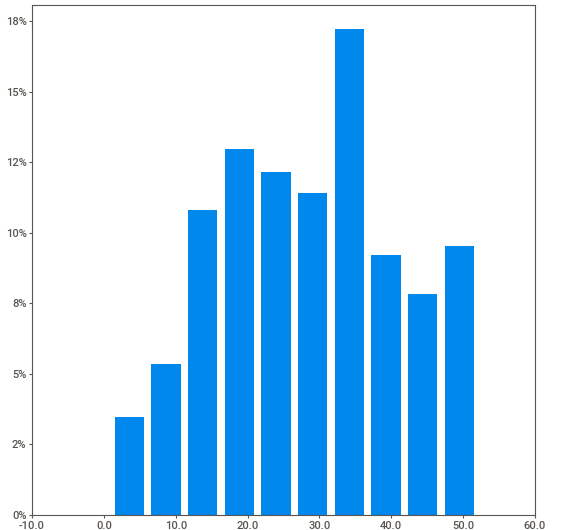
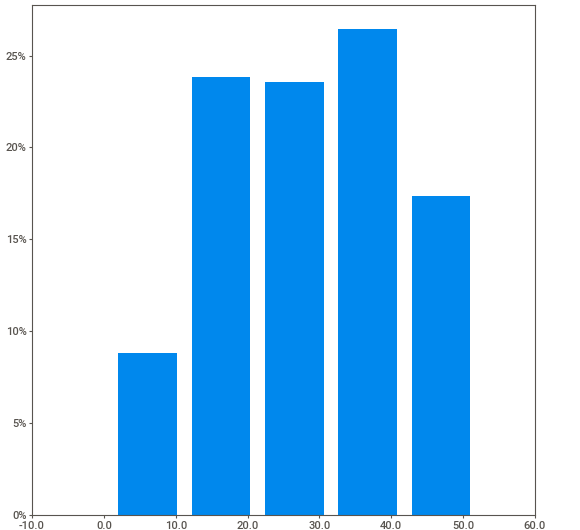
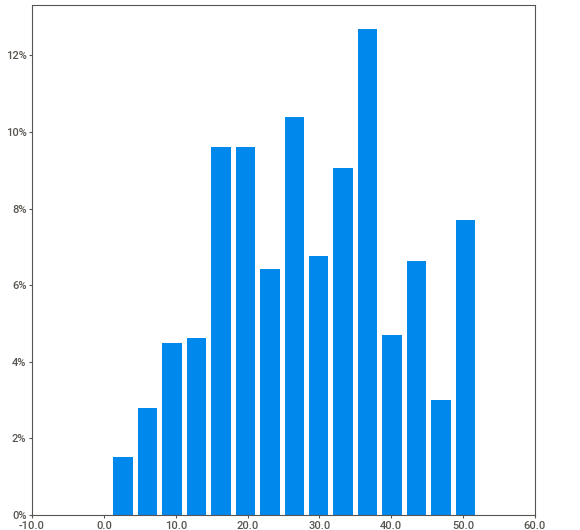
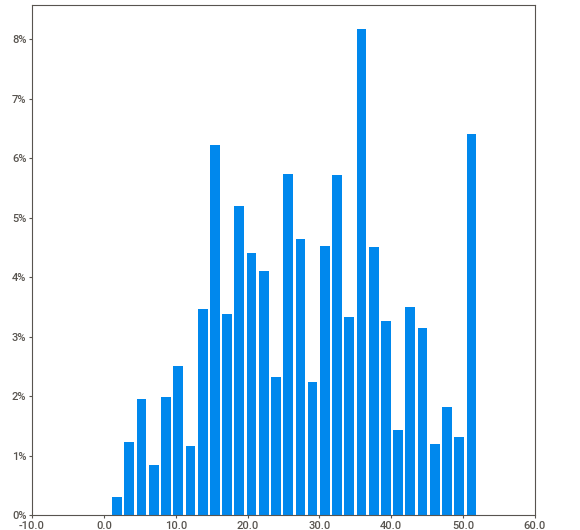
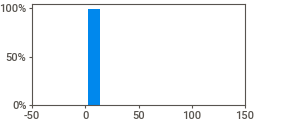
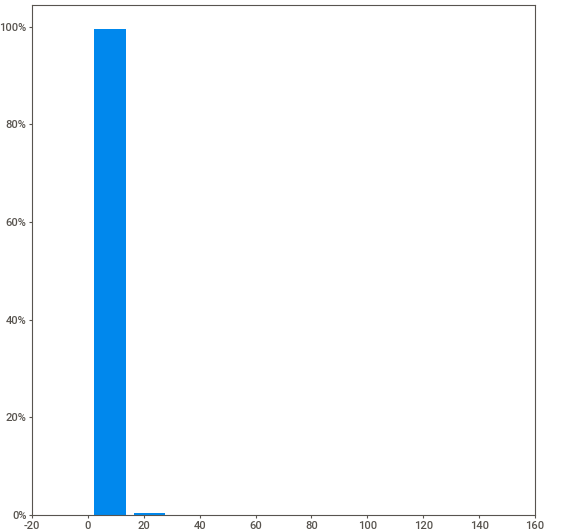
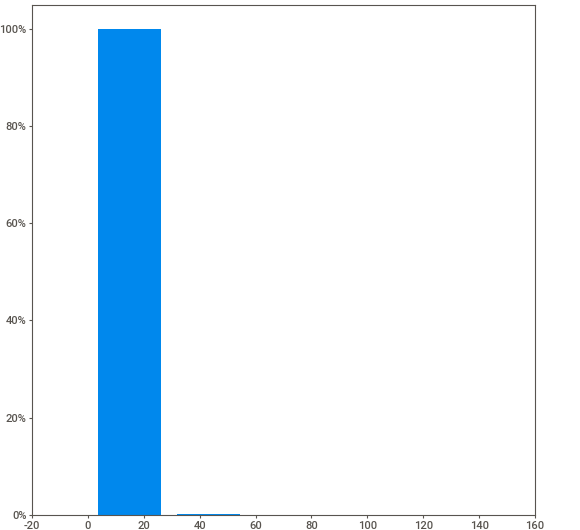
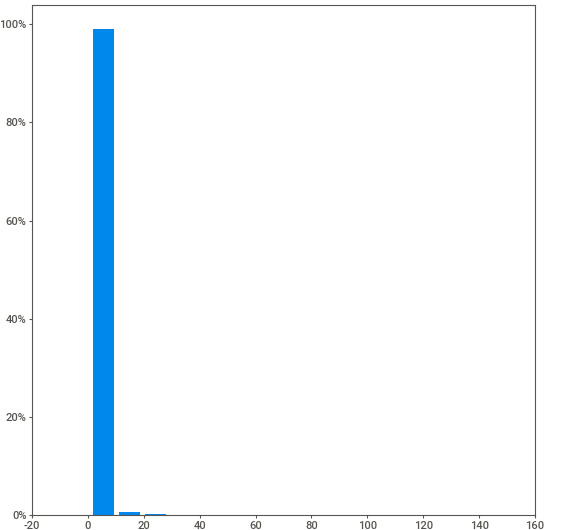
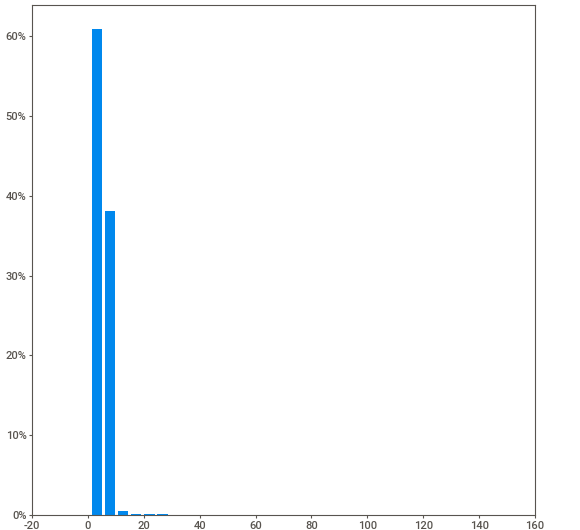
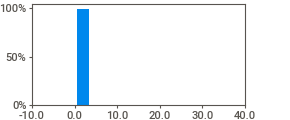
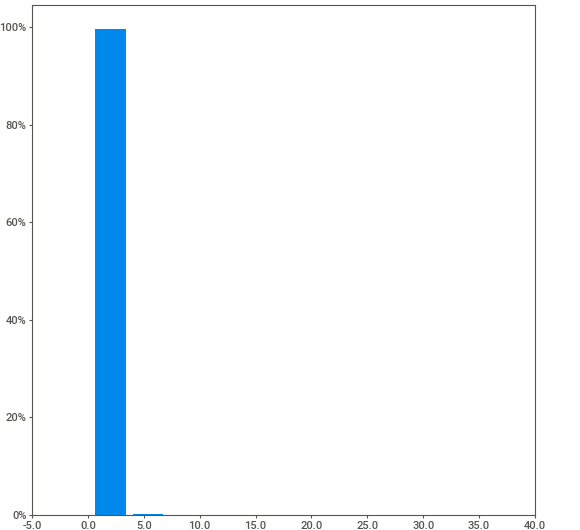
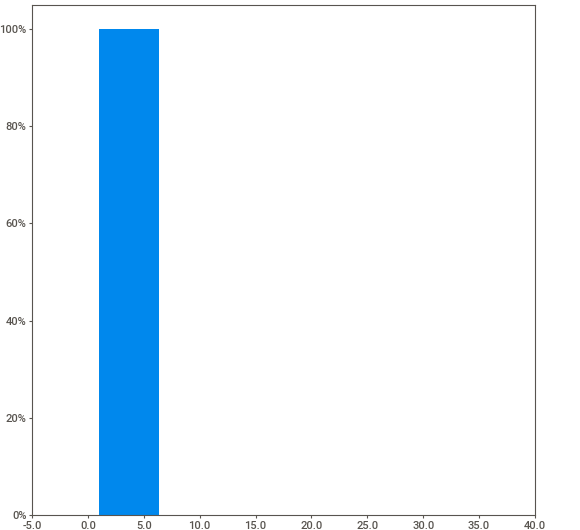
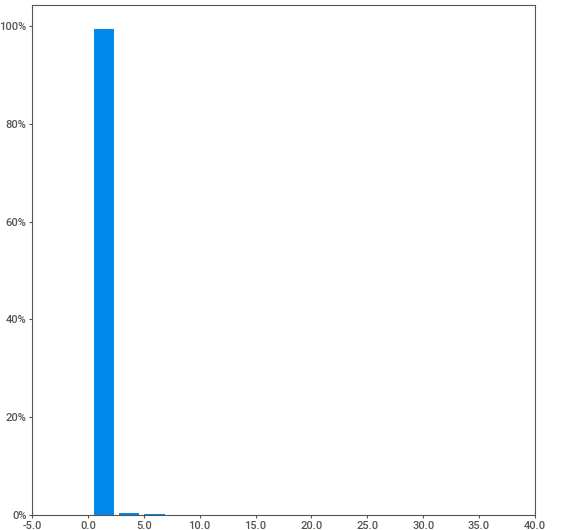
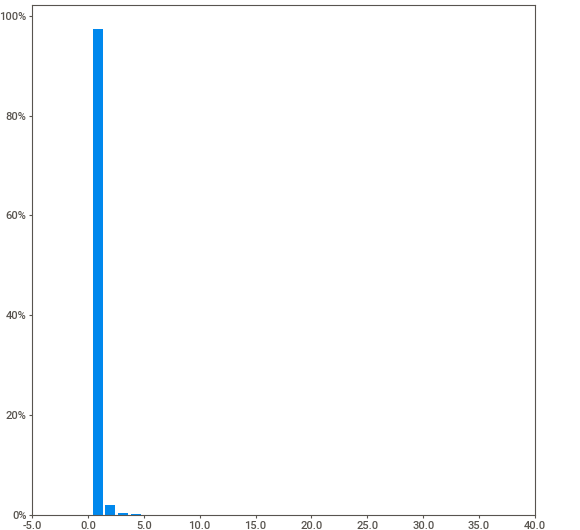
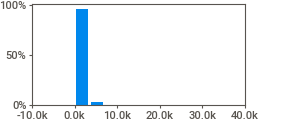
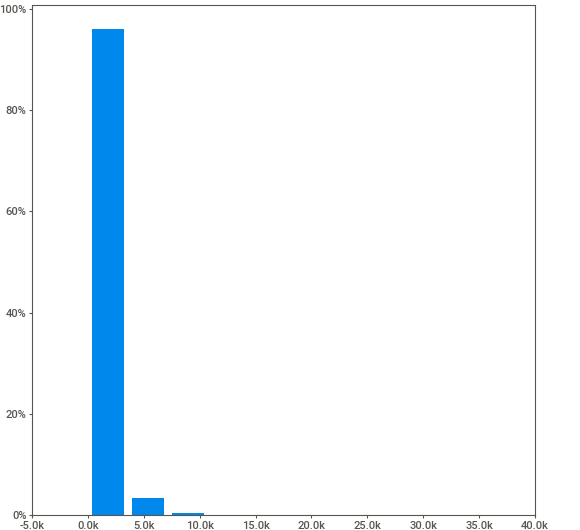
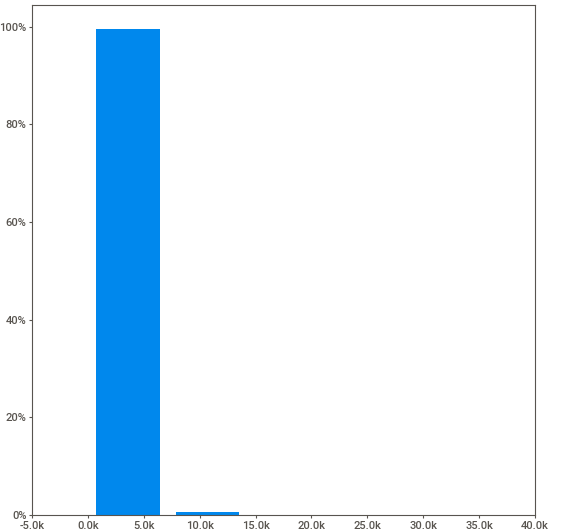
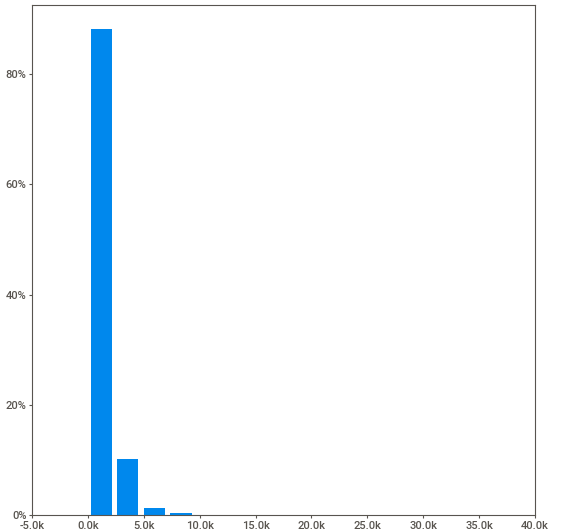
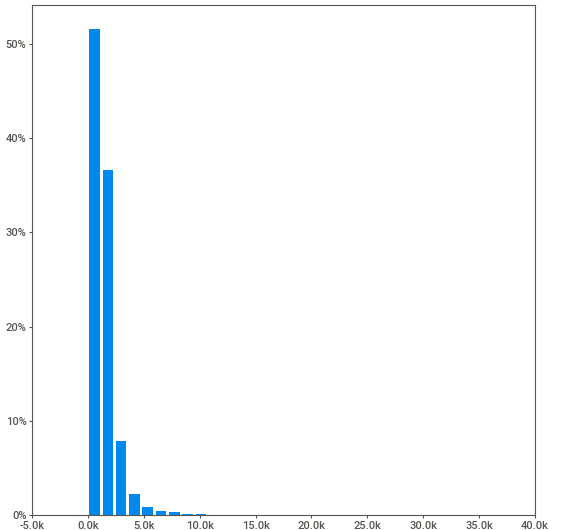
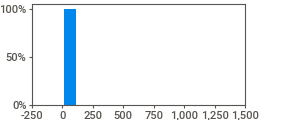
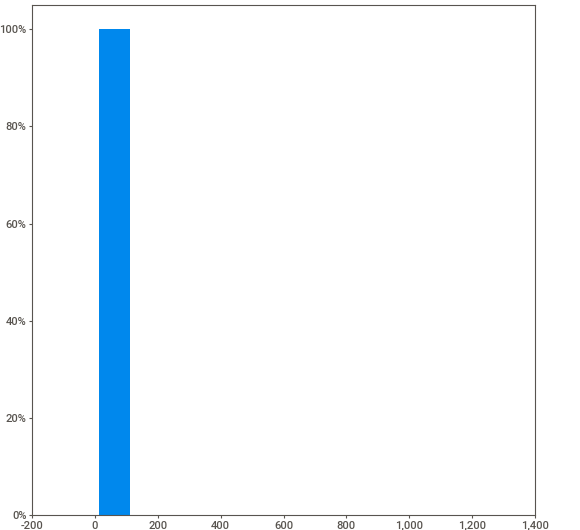
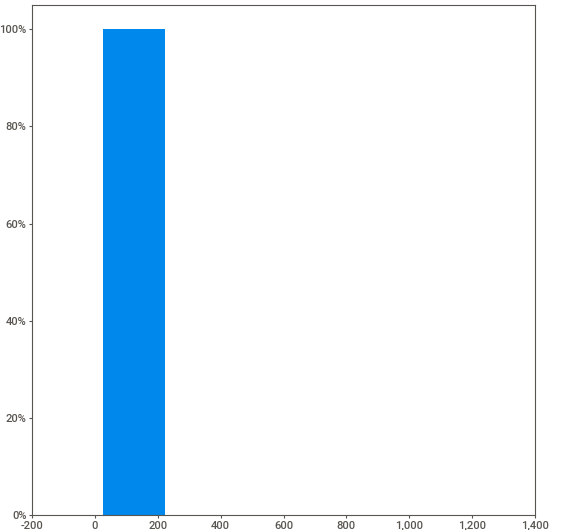
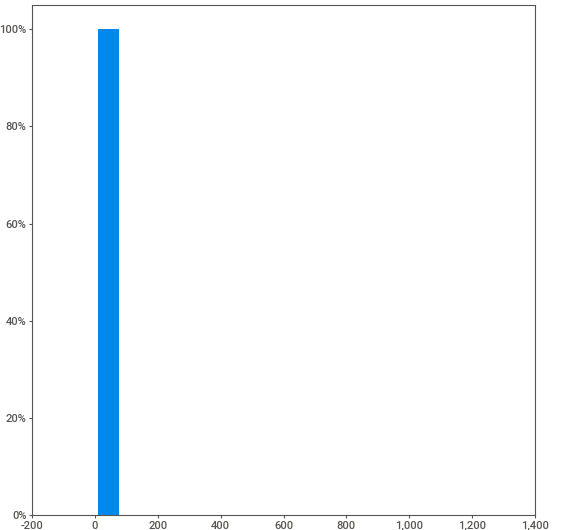
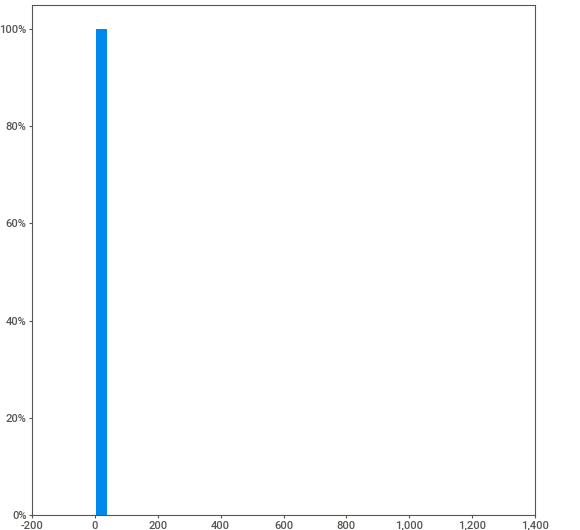
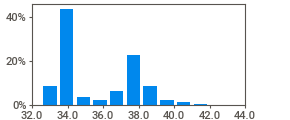
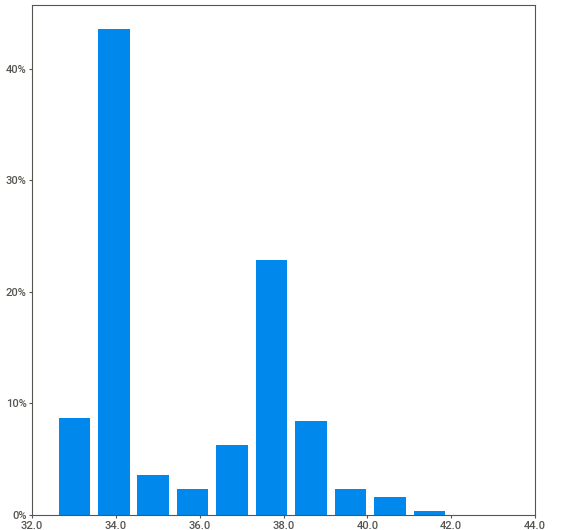
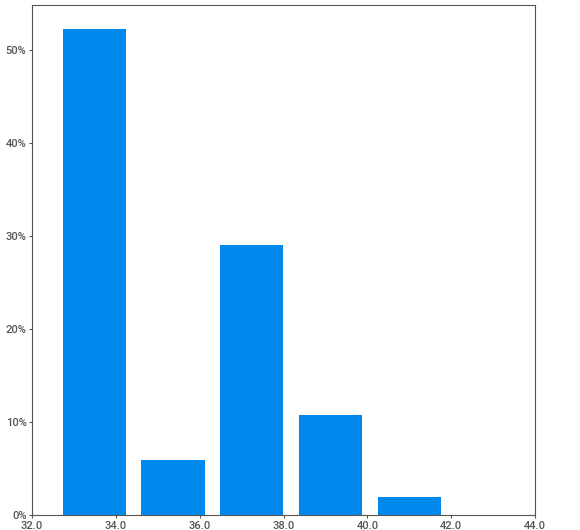
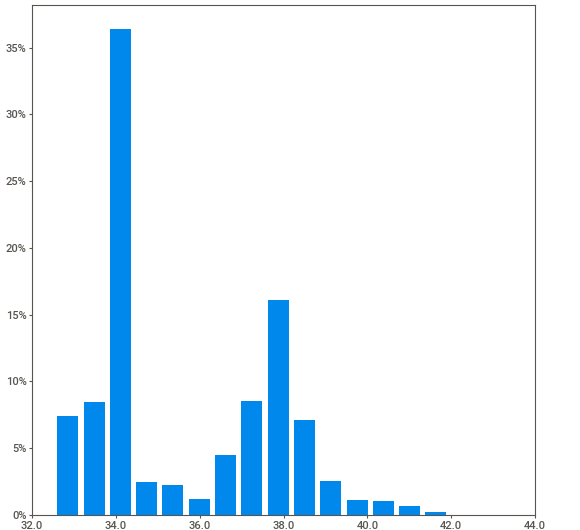
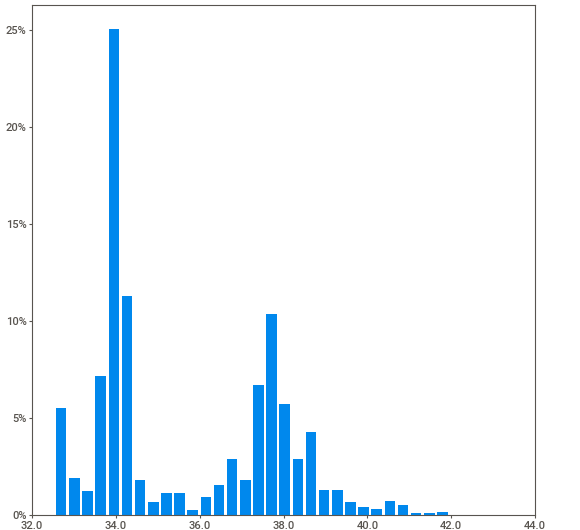
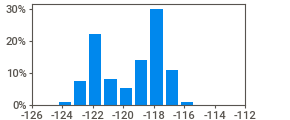
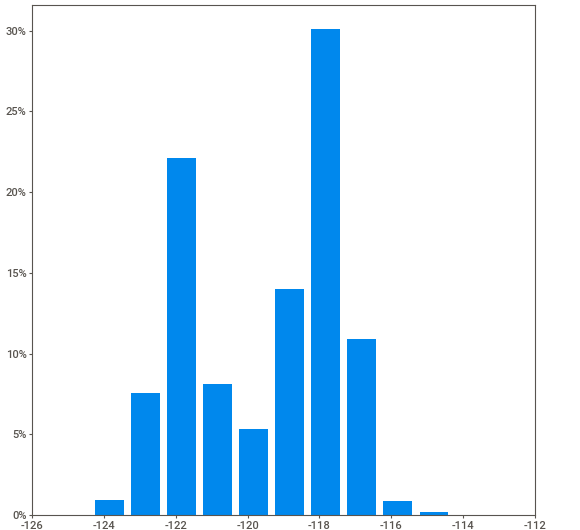
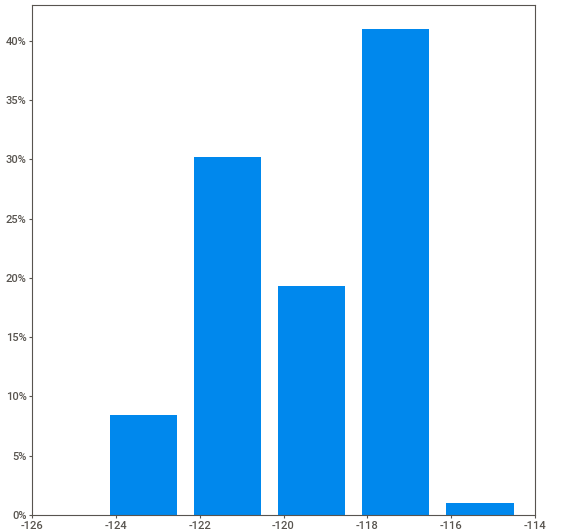
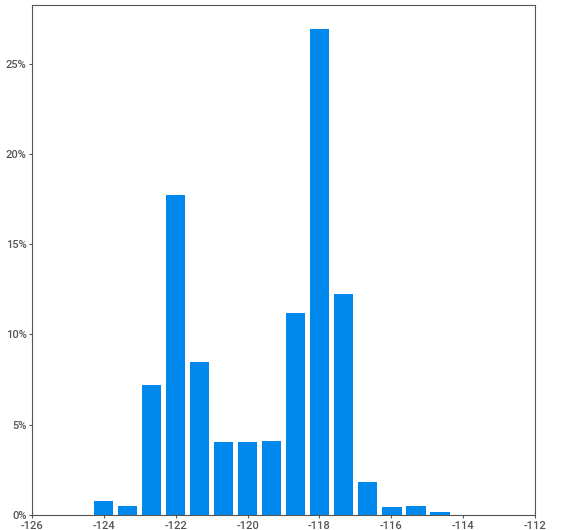
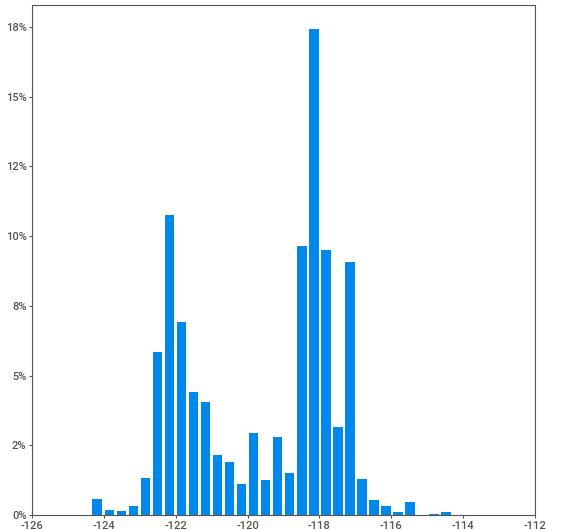
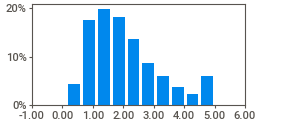
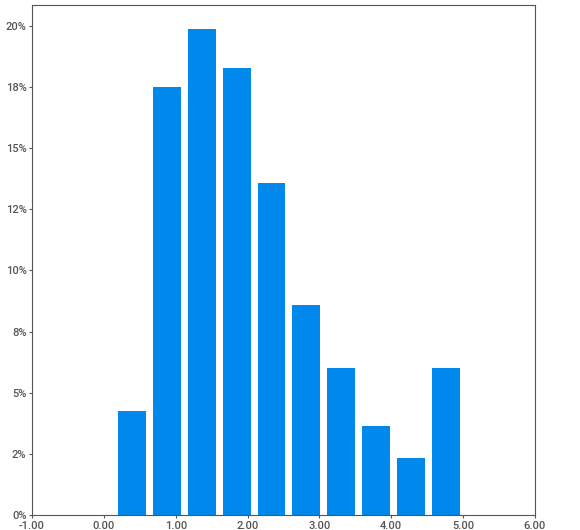
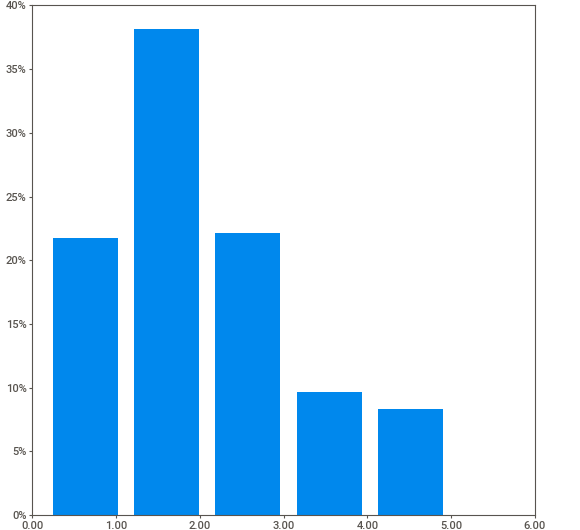
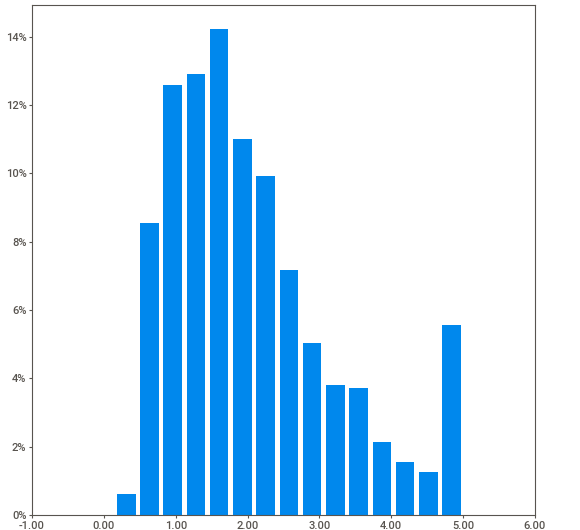
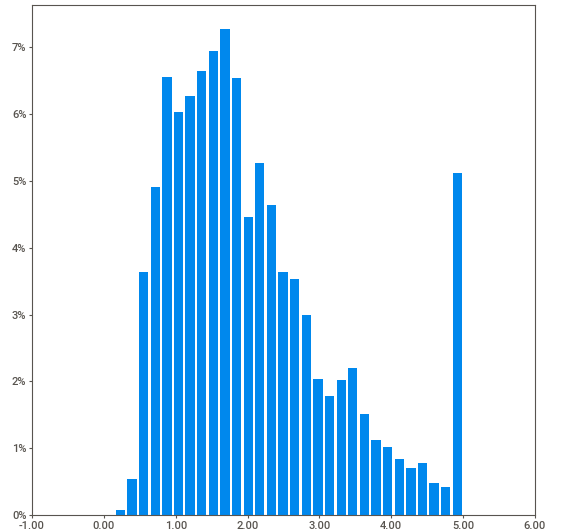
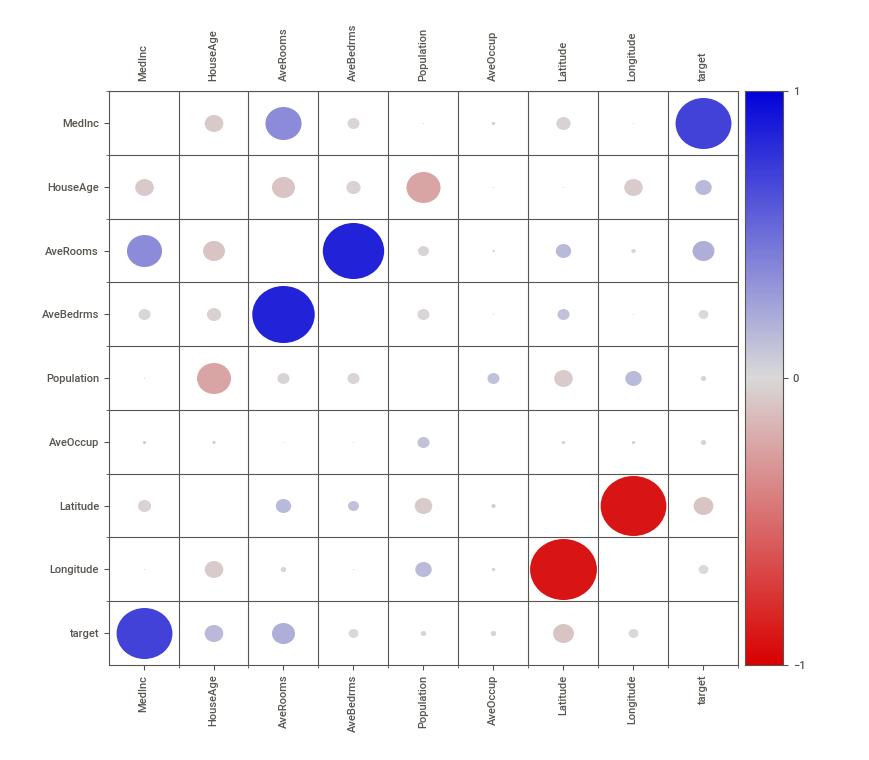
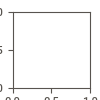

In [6]:
# we generate inline report
my_report.show_notebook()

## YDATA  PROFILING
https://github.com/ydataai/ydata-profiling

In [ ]:
!pip install ydata_profiling
#!pip install matplotlib==3.1.3

In [8]:
from ydata_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title="Profiling Report")

In [10]:
#To generate a HTML report file, save the ProfileReport to an object and use the to_file() function:
profile.to_file("ydata_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#The HTML report can be directly embedded in a cell in a similar fashion:
profile.to_notebook_iframe()

# AUTOML

## MLJAR
### https://github.com/mljar/mljar-supervised


<img src="https://raw.githubusercontent.com/mljar/visual-identity/main/media/infograph.png" alt="Alternative text"/>

<img src="https://raw.githubusercontent.com/mljar/mljar-examples/master/media/AutoML_overview_mljar_v3.svg" alt="Alternative text"/>

<img src="https://raw.githubusercontent.com/mljar/visual-identity/main/media/mljar_modes.png" alt="Alternative text" />

In [ ]:
!pip install mljar-supervised[full]

In [13]:
from supervised.automl import AutoML
automl = AutoML(mode="Perform",results_path="AutoML_regression")
# automl = AutoML(mode="Explain")
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_regression
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM rmse 0.450392 trained in 91.56 seconds (1-sample predict time 0.0785 seconds)
2_Default_Xgboost rmse 0.453164 trained in 34.8 seconds (1-sample predict time 0.0515 seconds)
3_Default_CatBoost rmse 0.44287 trained in 40.53 seconds (1-sample predict time 0.0548 seconds)
4_Default_NeuralNetwork rmse 0.552541 trained in 13.0 seconds (1-sample predict time 0.0693 seconds)
5_Default_RandomForest rmse 0.713242 trained 

AutoML(mode='Perform', results_path='AutoML_regression')

In [14]:
y_predicted = automl.predict(X_test)
y_predicted

array([1.52553401, 1.17108158, 1.39797969, ..., 4.8160869 , 1.10961594,
       2.05757979])

In [15]:
pd.read_csv('/content/AutoML_regression/leaderboard.csv')

name      model_type metric_type  metric_value  \
0        1_Default_LightGBM        LightGBM        rmse      0.450392   
1         2_Default_Xgboost         Xgboost        rmse      0.453164   
2        3_Default_CatBoost        CatBoost        rmse      0.442870   
3   4_Default_NeuralNetwork  Neural Network        rmse      0.552541   
4    5_Default_RandomForest   Random Forest        rmse      0.713242   
..                      ...             ...         ...           ...   
59         57_NeuralNetwork  Neural Network        rmse      0.543072   
60         58_NeuralNetwork  Neural Network        rmse      0.528125   
61          59_RandomForest   Random Forest        rmse      0.599894   
62          60_RandomForest   Random Forest        rmse      0.603716   
63                 Ensemble        Ensemble        rmse      0.435158   

    train_time  single_prediction_time  
0        93.22                  0.0785  
1        35.83                  0.0515  
2        41.66                  0.0548  
3        13.92                  0.0693  
4        21.06                  0.1317  
..         ...                     ...  
59       26.57                  0.0705  
60       32.11                  0.0712  
61       55.92                  0.1387  
62       46.72                  0.1717  
63        2.38                  0.5177  

[64 rows x 6 columns]

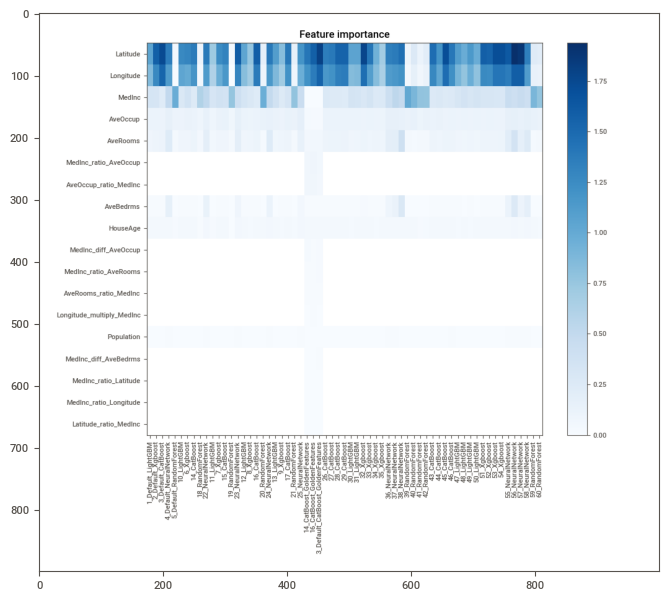

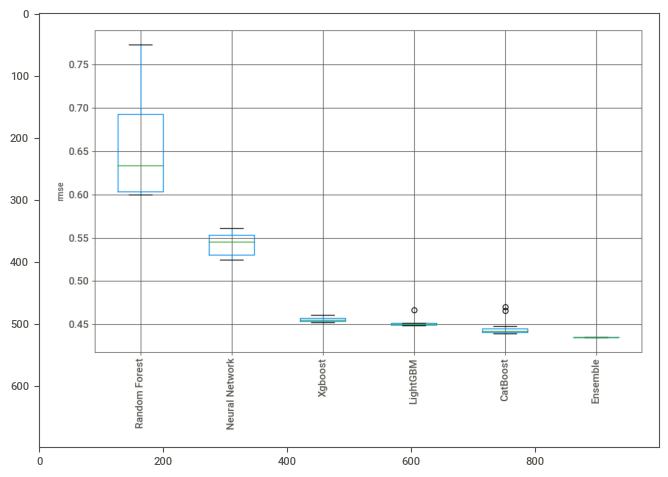

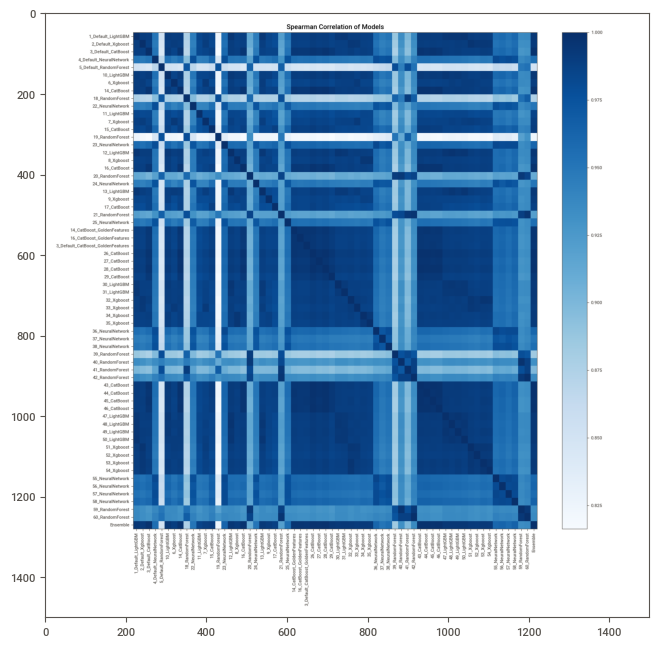

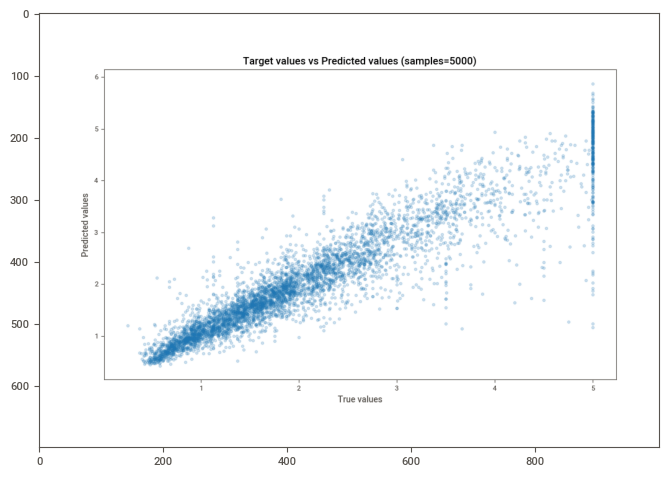

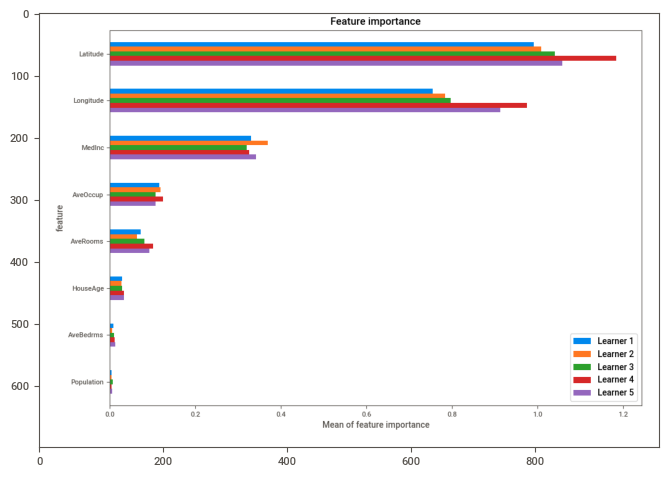

In [16]:
import imageio

def show_image(file):
  im=imageio.imread(file)
  plt.figure(figsize=(8,8))
  plt.imshow(im)
  plt.show()

show_image('/content/AutoML_regression/features_heatmap.png')
show_image('/content/AutoML_regression/ldb_performance_boxplot.png')
show_image('/content/AutoML_regression/correlation_heatmap.png')
show_image('/content/AutoML_regression/Ensemble/true_vs_predicted.png')
show_image('/content/AutoML_regression/30_LightGBM/permutation_importance.png')


# PYCARET
### https://pycaret.gitbook.io/docs/

## LAZYPREDICT
https://lazypredict.readthedocs.io/en/latest/